In [2]:
#Import necessary packages
"""
Identify text in an image, I am using MNIST dataset,
every image is 28x28 pixels
Using method nn form pytorch
"""

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
#import helper
import matplotlib.pyplot as plt


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


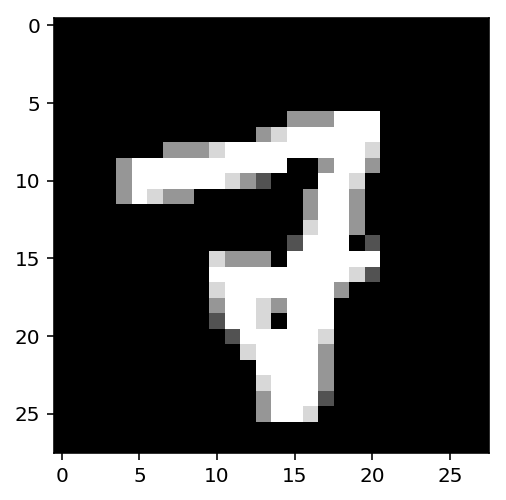

In [69]:
#this dataset is available in torchvision package
from torchvision import datasets, transforms
#Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
#Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#for image, label in trainloader:
 #   print(image)
dataiter = iter(trainloader)
images, label = dataiter.next()
print(type(images))
print(images.shape)

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [83]:
"""
This kind of networks are called fully-connected(Each unit in one layer is connected to each unit in the next layer)
so the input to each layer must be a one-dimensional vector
image is 28x28 I have to convert it to 1D vector = 784 -> 64 x 784
FLATTENING 2D in 1D vector
"""

def activation_sigmoid(x):
    return 1 / (1 + torch.exp(-x))

torch.manual_seed(7)
n_input = 784
n_output = 10
n_hidden = 256
n_size = 64

features = images.view(images.shape[0], -1)

W1 = torch.rand((n_input, n_hidden))
B1 = torch.randn( n_hidden)
o_hidden = activation_sigmoid(torch.mm(features, W1) + B1)

W2 = torch.rand((n_hidden, n_output))
B2 = torch.randn(n_output)
o_output = torch.mm(o_hidden, W2) + B2

o_output.shape


#dim = 0 takes the sum across the rows while dim = 0 takes sum across the columns
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

print(softmax(features))
print(torch.sum(softmax(features), dim = 1))






torch.Size([64, 1])
tensor([[0.0006, 0.0006, 0.0006,  ..., 0.0006, 0.0006, 0.0006],
        [0.0006, 0.0006, 0.0006,  ..., 0.0006, 0.0006, 0.0006],
        [0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0008],
        ...,
        [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
        [0.0007, 0.0007, 0.0007,  ..., 0.0007, 0.0007, 0.0007],
        [0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0008]])
torch.Size([64, 1])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
  